## PyTorch data

PyTorch comes with a nice paradigm for dealing with data which we'll use here. A PyTorch [`Dataset`](http://pytorch.org/docs/master/data.html#torch.utils.data.Dataset) knows where to find data in its raw form (files on disk) and how to load individual examples into Python datastructures. A PyTorch [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) takes a dataset and offers a variety of ways to sample batches from that dataset.

Take a moment to browse through the `CIFAR10` `Dataset` in `2_pytorch/cifar10.py`, read the `DataLoader` documentation linked above, and see how these are used in the section of `train.py` that loads data. Note that in the first part of the homework we subtracted a mean CIFAR10 image from every image before feeding it in to our models. Here we subtract a constant color instead. Both methods are seen in practice and work equally well.

PyTorch provides lots of vision datasets which can be imported directly from [`torchvision.datasets`](http://pytorch.org/docs/master/torchvision/datasets.html). Also see [`torchtext`](https://github.com/pytorch/text#datasets) for natural language datasets.

## Softmax Classifier in PyTorch

In PyTorch Deep Learning building blocks are implemented in the neural network module [`torch.nn`](http://pytorch.org/docs/master/nn.html#) (usually imported as `nn`). A PyTorch model is typically a subclass of [`nn.Module`](http://pytorch.org/docs/master/nn.html#torch.nn.Module) and thereby gains a multitude of features. Because your logistic regressor is an `nn.Module` all of its parameters and sub-modules are accessible through the `.parameters()` and `.modules()` methods.

Now implement a softmax classifier by filling in the marked sections of `models/softmax.py`. 

The main driver for this question is `train.py`. It reads arguments and model hyperparameter from the command line, loads CIFAR10 data and the specified model (in this case, softmax). Using the optimizer initialized with appropriate hyperparameters, it trains the model and reports performance on test data. 

Complete the following couple of sections in `train.py`:
1. Initialize an optimizer from the torch.optim package
2. Update the parameters in model using the optimizer initialized above

At this point all of the components required to train the softmax classifer are complete for the softmax classifier. Now run

    $ run_softmax.sh

to train a model and save it to `softmax.pt`. This will also produce a `softmax.log` file which contains training details which we will visualize below.   

**Note**: You may want to adjust the hyperparameters specified in `run_softmax.sh` to get reasonable performance.

## Visualizing the PyTorch model

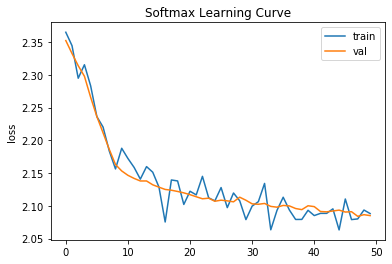

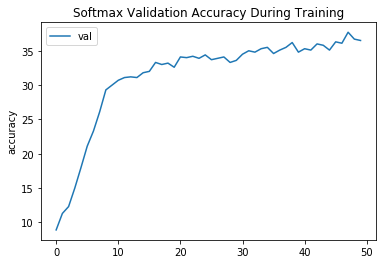

In [1]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

# Parse the train and val losses one line at a time.
import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('softmax.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Softmax Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig('softmax_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title('Softmax Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('softmax_valaccuracy.png')

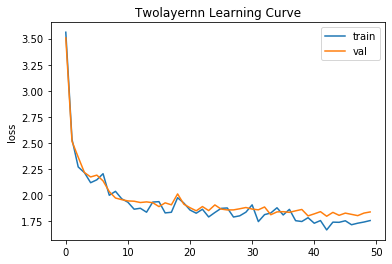

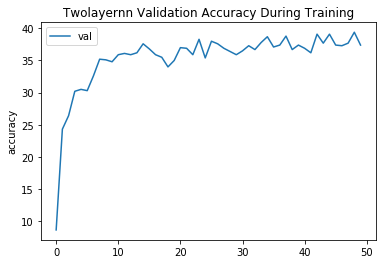

In [10]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
#import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
#import matplotlib.pyplot as plt
%matplotlib inline

# Parse the train and val losses one line at a time.
#import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('twolayernn.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Twolayernn Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig('Twolayernn_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title('Twolayernn Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('Twolayernn_valaccuracy.png')

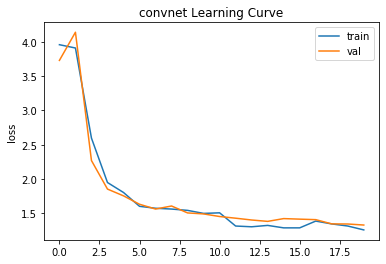

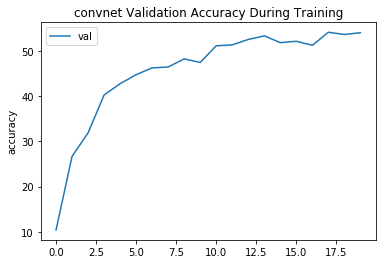

In [11]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
#import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
#import matplotlib.pyplot as plt
%matplotlib inline

# Parse the train and val losses one line at a time.
#import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('convnet.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('convnet Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig('convnet_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title('convnet Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('convnet_valaccuracy.png')

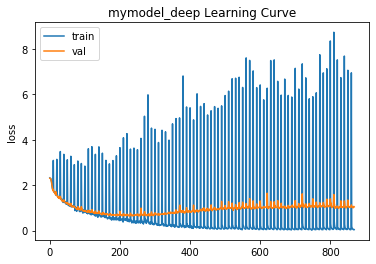

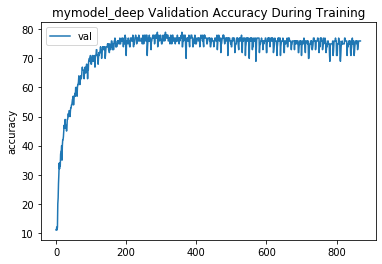

In [2]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
#import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
#import matplotlib.pyplot as plt
%matplotlib inline

# Parse the train and val losses one line at a time.
#import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('mymodel_deep.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('mymodel_deep Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig('mymodel_deep_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title('mymodel_deep Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('mymodel_deep_valaccuracy.png')

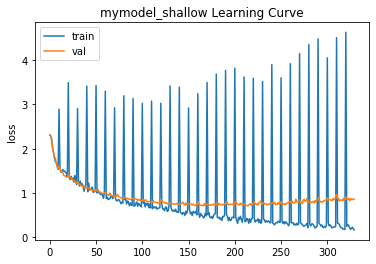

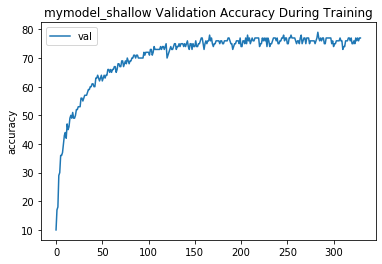

In [3]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
#import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
#import matplotlib.pyplot as plt
%matplotlib inline

# Parse the train and val losses one line at a time.
#import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('mymodel_shallow.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('mymodel_shallow Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig('mymodel_shallow_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title('mymodel_shallow Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('mymodel_shallow_valaccuracy.png')

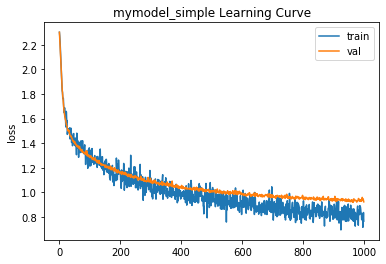

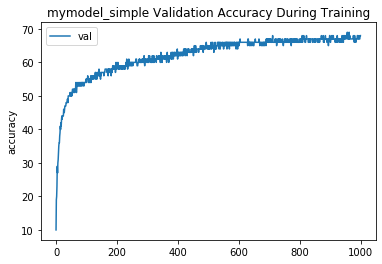

In [5]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
#import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
#import matplotlib.pyplot as plt
%matplotlib inline

# Parse the train and val losses one line at a time.
#import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('mymodel_simple.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

fig = plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('mymodel_simple Learning Curve')
plt.ylabel('loss')
plt.legend()
fig.savefig('mymodel_simple_lossvstrain.png')

fig = plt.figure()
plt.plot(val_accs, label='val')
plt.title('mymodel_simple Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('mymodel_simple_valaccuracy.png')